In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Heiti TC']

文章开始前，先做一点准备：

In [2]:
data = pd.DataFrame({'x':np.arange(1, 10, 2), 'y':np.arange(5)}) # 示例数据
data

,x,y
0,1,0
1,3,1
2,5,2
3,7,3
4,9,4


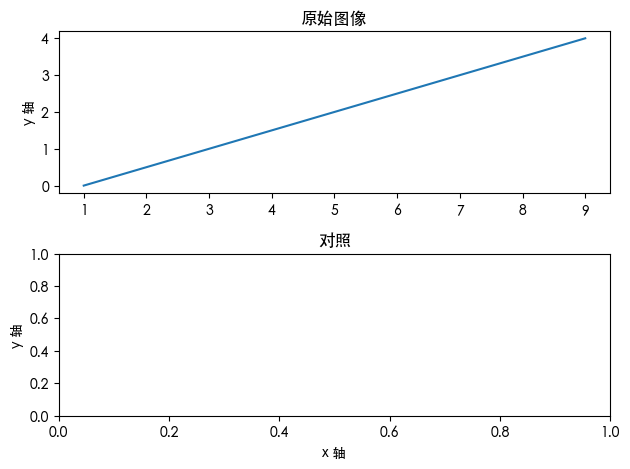

In [3]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(data['x'], data['y'])
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('对照')

fig.tight_layout()
plt.show()

# 下面正式开始。

函数格式：
```python
plot(*args, scalex=True, scaley=True, data=None, **kwargs)
```
调用方式：
```python
plot([x], y, [fmt], *, data=None, **kwargs) # 画一条线
plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs) # 同时画多条线
```
## 1. 如果只画一条线，使用第一行的代码。
其中 `x` 可省略，此时 x 轴坐标为 0...N-1（N 为 y 的个数）。

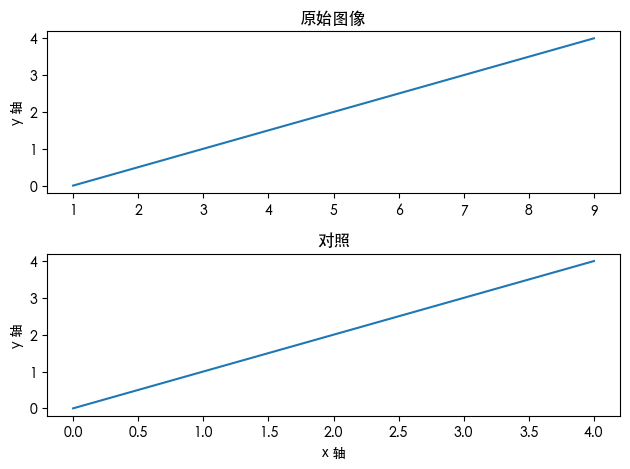

In [4]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(data['x'], data['y'])
ax1.set_ylabel('y 轴')
ax1.set_title('原始图像')

ax2.plot(data['y']) # x 轴变成了 0 ~ 4
ax2.set_xlabel('x 轴')
ax2.set_ylabel('y 轴')
ax2.set_title('对照')

fig.tight_layout()
plt.show()

## 2. fmt 是一个字符串，格式是 `[marker][line][color]`，都是可选参数如果没有提供 marker，则生成一条没有 marker 的线。
### 2.1 marker：规定了每个数据点的形状，可省略。与 marker 有关的内容会在以后详述。
有 `.`，`,`，`o`，`v`，`^`，`<`，`>`，`1`，`2`，`3`，`4`，`8`，`s`，`p`，`P`，`*`，`h`，`H`，`+`，`x`，`X`，`D`，`d`，`|`，`_` 可选。

### 2.2 line：规定了线的风格。
有 `-`，`--`，`-.`，`:`，`'none'`（或者 `'None'`、`' '`）可选。

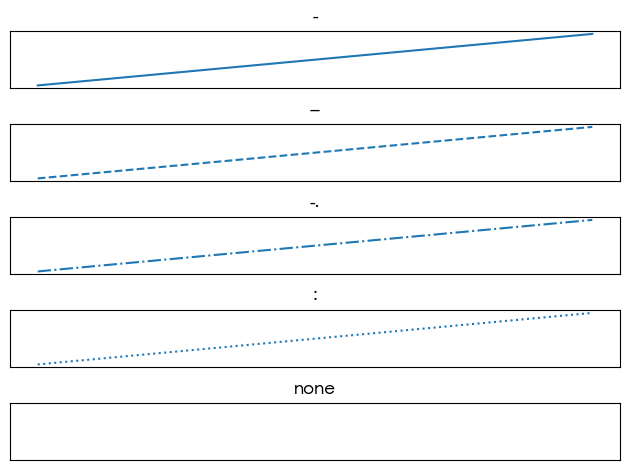

In [5]:
line_styles = ['-', '--', '-.', ':', 'none']

fig, axes = plt.subplots(5, 1)

for i, style in enumerate(line_styles):
    axes[i].plot(data['x'], style) # 线的风格
    axes[i].set_title(style)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
fig.tight_layout()
plt.show()

### 2.3 color：线的颜色。
`matplotlib` 内置了 8 个单字母命名的颜色，可直接在 `fmt` 内调用，也可传入 `color` 参数。

In [6]:
from matplotlib import colors as mcolors

print(list(dict(mcolors.BASE_COLORS).keys()))

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


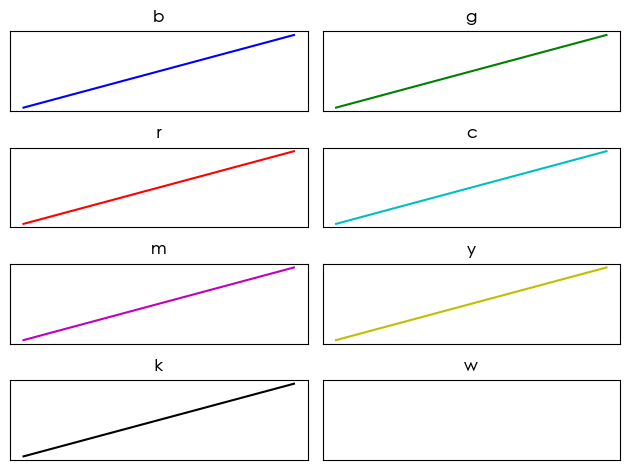

In [7]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

fig, axes = plt.subplots(4, 2)
axes = axes.reshape(8).squeeze()

for i, color in enumerate(colors):
    axes[i].plot(data['x'], color) # 线的颜色
    axes[i].set_title(color)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
fig.tight_layout()
plt.show()

将这三个参数（或任意一个或两个）组合成为一个字符串，传入 `plot` 函数即可。

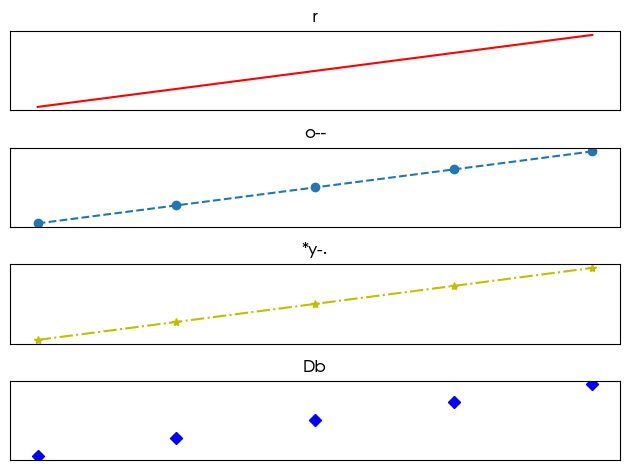

In [8]:
# 几个例子
line_styles = ['r', 'o--', '*y-.', 'Db'] # 'o'、'*'、'D' 均为标记，后续会提到。

fig, axes = plt.subplots(4, 1)

for i, style in enumerate(line_styles):
    axes[i].plot(data['x'], style) # 线的风格
    axes[i].set_title(style)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
fig.tight_layout()
plt.show()

同时还内置了更多预设颜色，可以直接用其名字。

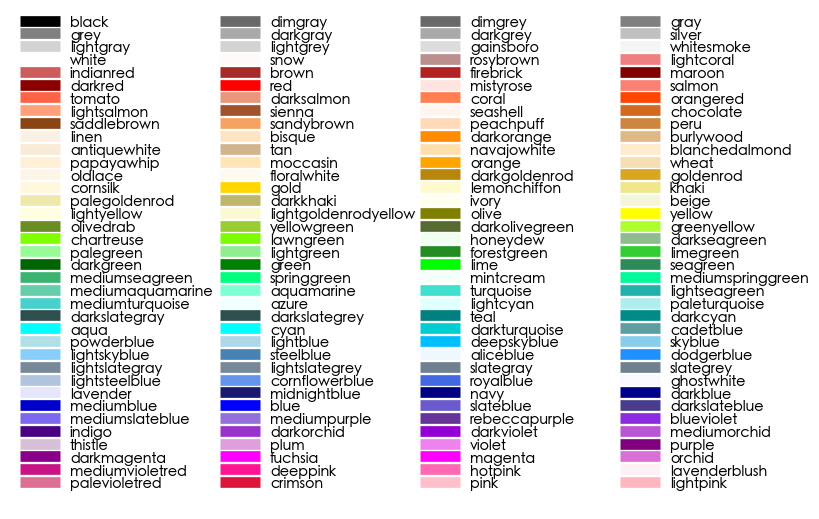

In [9]:
# https://matplotlib.org/2.0.2/examples/color/named_colors.html
# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in mcolors.CSS4_COLORS.items())
sorted_names = [name for hsv, name in by_hsv]

n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

fig, ax = plt.subplots(figsize=(8, 5))

# Get height and width
X, Y = fig.get_dpi() * fig.get_size_inches()
h = Y / (nrows + 1)
w = X / ncols

for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    y = Y - (row * h) - h

    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text, y, name, fontsize=(h * 0.8),
            horizontalalignment='left',
            verticalalignment='center')

    ax.hlines(y + h * 0.1, xi_line, xf_line,
              color=mcolors.CSS4_COLORS[name], linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1,
                    top=1, bottom=0,
                    hspace=0, wspace=0)
plt.show()

## 3. 也可以使用 `matplotlib.line.Line2D` 的参数来控制线的形状：
```python 
matplotlib.lines.Line2D(xdata, ydata, *, linewidth=None, linestyle=None, color=None, gapcolor=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
```
无需调用这个函数，将参数直接写在 `plot` 函数内即可。比较重要的参数有：

- `linewidth`：线宽

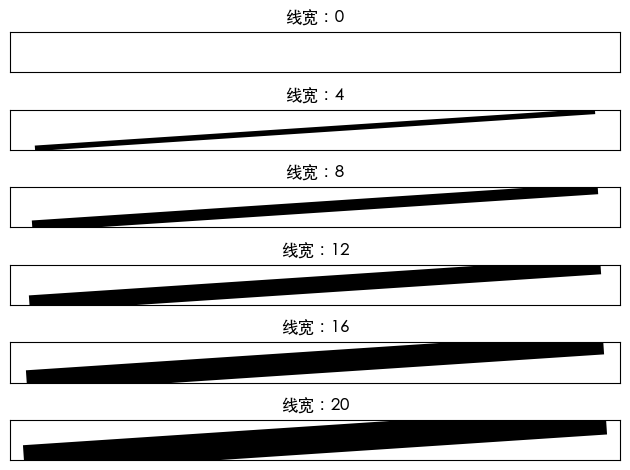

In [10]:
fig, axes = plt.subplots(6, 1)

for i, width in enumerate(range(0, 21, 4)):
    axes[i].plot(data['x'], data['y'], linewidth=width, color='black')
    axes[i].set_title(f'线宽：{width}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
fig.tight_layout()
plt.show()

- `linestyle`：线的样式
<p>有两种方式设置线的风格。一种是直接使用内置的名称：</p>

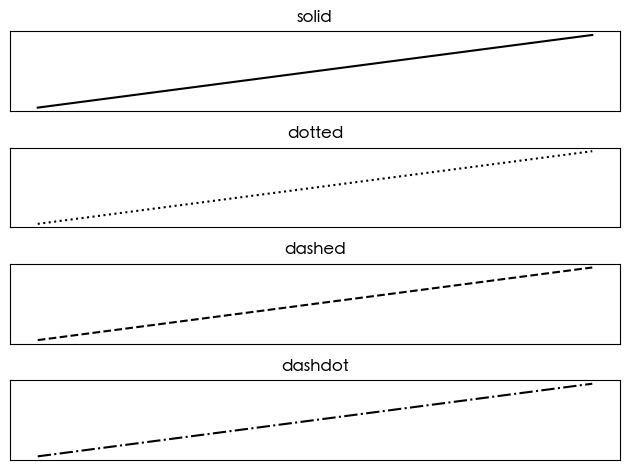

In [11]:
styles = ['solid', 'dotted', 'dashed', 'dashdot']

fig, axes = plt.subplots(4, 1)

for i, style in enumerate(styles):
    axes[i].plot(data['x'], data['y'], linestyle=style, color='black')
    axes[i].set_title(style)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    
fig.tight_layout()
plt.show()

或者使用 `(offset, (on_off_seq))` 方式进行设置。`offset` 为偏移量；`(on_off_seq)` 是一个包含 2\*N 个元素的元组，奇数项为点的数量，偶数项为空位的数量。比如 `(5, (1, 2, 3, 4))` 的意思是起点向右偏移 5 个像素，然后画一条 1 个像素的直线，然后空 2 个像素，然后画一条 3 个像素的直线，然后空 4 个像素，循环。

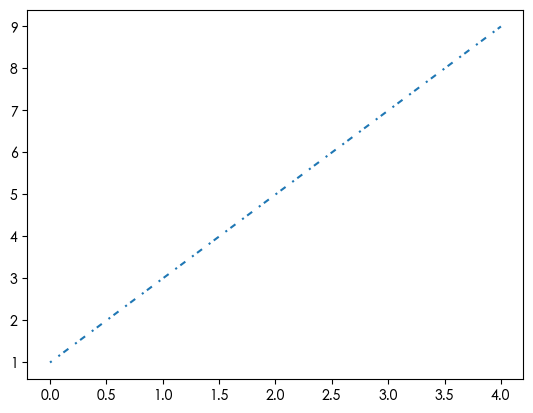

In [12]:
fig, ax = plt.subplots()

ax.plot(data['x'], linestyle=(5, (1, 2, 3, 4)))
plt.show()

# 4. 同时画多条线
<p>也可以在一条代码中画多条线，传入 x（可选）、y、线的格式（可选）即可</p>

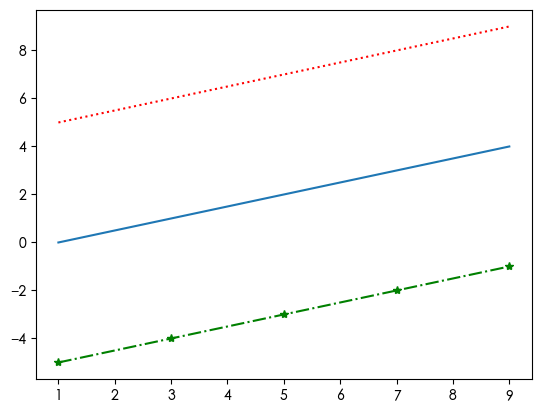

In [13]:
fig, ax = plt.subplots()
ax.plot(data['x'], data['y'], 
        data['x'], data['y'] + 5, 'r:',
        data['x'], data['y'] - 5, 'g*-.')
plt.show()